In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse = pd.read_csv(mouse_drug_data_to_load)
clinical = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
data = pd.merge(clinical, mouse, on="Mouse ID", how="inner")

# Display the data table for preview
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint

drug_time = data.groupby(["Drug","Timepoint"]).mean()

# Convert to DataFrame

drug_time = drug_time.reset_index()
del drug_time["Metastatic Sites"]


# Preview DataFrame

drug_time.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

drug_sem = data.groupby(["Drug","Timepoint"]).sem()

# Convert to DataFrame
drug_sem = drug_sem.reset_index()
del drug_sem["Metastatic Sites"]
del drug_sem["Mouse ID"]

# Preview DataFrame
drug_sem.head()



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames

drug_pivot = pd.pivot_table(drug_time,index="Timepoint",columns="Drug", values="Tumor Volume (mm3)")

# Preview that Reformatting worked

drug_pivot


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


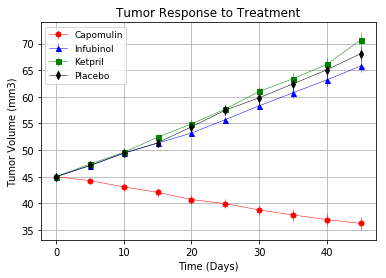

In [266]:
# Create the x any points
x_axis = drug_pivot.index
capomulin = drug_pivot["Capomulin"]
infubinol = drug_pivot["Infubinol"]
ketapril = drug_pivot["Ketapril"]
placebo = drug_pivot["Placebo"]

capomulin_se = drug_sem.loc[(drug_sem["Drug"] == "Capomulin"), :]["Tumor Volume (mm3)"]
infubinol_se = drug_sem.loc[(drug_sem["Drug"] == "Infubinol"), :]["Tumor Volume (mm3)"]
ketapril_se = drug_sem.loc[(drug_sem["Drug"] == "Ketapril"), :]["Tumor Volume (mm3)"]
placebo_se = drug_sem.loc[(drug_sem["Drug"] == "Placebo"), :]["Tumor Volume (mm3)"]

plt.errorbar(x_axis, capomulin, capomulin_se, marker="o", c='r', linewidth=.5, markersize=5, label = "Capomulin")
plt.errorbar(x_axis, infubinol, infubinol_se, marker="^", c='b', linewidth=.5, markersize=5, label = "Infubinol")
plt.errorbar(x_axis, ketapril, ketapril_se, marker="s", c='g', linewidth=.5, markersize=5, label = "Ketpril")
plt.errorbar(x_axis, placebo, placebo_se, marker="d", c='k', linewidth=.5, markersize=5, label = "Placebo")

# Add elements to graph
plt.grid()
plt.legend(loc="best", fontsize = 9)

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")


plt.savefig("Tumor Response to Treatment")

## Metastatic Response to Treatment

In [267]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

met_site_time = data.groupby(["Drug","Timepoint"]).mean()

# Convert to DataFrame

met_site_time = met_site_time.reset_index()
del met_site_time["Tumor Volume (mm3)"]


# Preview DataFrame

met_site_time.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [268]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

met_site_sem = data.groupby(["Drug","Timepoint"]).sem()

# Convert to DataFrame
met_site_sem = met_site_sem.reset_index()
del met_site_sem["Tumor Volume (mm3)"]
del met_site_sem["Mouse ID"]

# Preview DataFrame
met_site_sem.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [269]:
# Minor Data Munging to Re-Format the Data Frames

met_site_pivot = pd.pivot_table(met_site_time,index="Timepoint",columns="Drug", values="Metastatic Sites")

# Preview that Reformatting worked

met_site_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


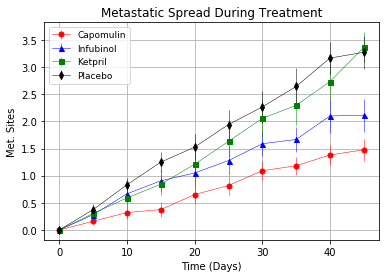

In [270]:
# Generate the Plot (with Error Bars)

# Get x and y points
x_axis = met_site_pivot.index
capomulin = met_site_pivot["Capomulin"]
infubinol = met_site_pivot["Infubinol"]
ketapril = met_site_pivot["Ketapril"]
placebo = met_site_pivot["Placebo"]

capomulin_se = met_site_sem.loc[(met_site_sem["Drug"] == "Capomulin"), :]["Metastatic Sites"]
infubinol_se = met_site_sem.loc[(met_site_sem["Drug"] == "Infubinol"), :]["Metastatic Sites"]
ketapril_se = met_site_sem.loc[(met_site_sem["Drug"] == "Ketapril"), :]["Metastatic Sites"]
placebo_se = met_site_sem.loc[(met_site_sem["Drug"] == "Placebo"), :]["Metastatic Sites"]

plt.errorbar(x_axis, capomulin, capomulin_se, marker="o", c='r', linewidth=.5, markersize=5, label = "Capomulin")
plt.errorbar(x_axis, infubinol, infubinol_se, marker="^", c='b', linewidth=.5, markersize=5, label = "Infubinol")
plt.errorbar(x_axis, ketapril, ketapril_se, marker="s", c='g', linewidth=.5, markersize=5, label = "Ketpril")
plt.errorbar(x_axis, placebo, placebo_se, marker="d", c='k', linewidth=.5, markersize=5, label = "Placebo")

# Add elements to graph
plt.grid()
plt.legend(loc="best", fontsize = 9)

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Met. Sites")

plt.savefig("Metastatic Spread During Treatment")


## Survival Rates

In [271]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mouse_time = data.groupby(["Drug","Timepoint"]).count()

# Convert to DataFrame

mouse_time = mouse_time.reset_index()
del mouse_time["Tumor Volume (mm3)"]
del mouse_time["Metastatic Sites"]

mouse_time = mouse_time.rename(columns={"Mouse ID": "Mouse Count"})

# Preview DataFrame

mouse_time.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [272]:
# Minor Data Munging to Re-Format the Data Frames

mouse_pivot = pd.pivot_table(mouse_time,index="Timepoint",columns="Drug", values="Mouse Count")

# Preview that Reformatting worked

mouse_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


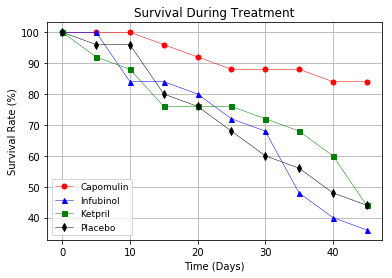

In [274]:
# Generate the Plot (Accounting for percentages)

# Get x and y points
x_axis = mouse_pivot.index
capomulin = [ (x/(max(mouse_pivot["Capomulin"])))*100 for x in mouse_pivot["Capomulin"] ] 
infubinol = [ (x/(max(mouse_pivot["Infubinol"])))*100 for x in mouse_pivot["Infubinol"] ]
ketapril = [ (x/(max(mouse_pivot["Ketapril"])))*100 for x in mouse_pivot["Ketapril"] ]
placebo = [ (x/(max(mouse_pivot["Placebo"])))*100 for x in mouse_pivot["Placebo"] ]

plt.errorbar(x_axis, capomulin, marker="o", c='r', linewidth=.5, markersize=5, label = "Capomulin")
plt.errorbar(x_axis, infubinol, marker="^", c='b', linewidth=.5, markersize=5, label = "Infubinol")
plt.errorbar(x_axis, ketapril, marker="s", c='g', linewidth=.5, markersize=5, label = "Ketpril")
plt.errorbar(x_axis, placebo, marker="d", c='k', linewidth=.5, markersize=5, label = "Placebo")

# Add elements to graph
plt.grid()
plt.legend(loc="best", fontsize = 9)

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

plt.savefig("Survival During Treatment")

## Summary Bar Graph

In [275]:
# Calculate the percent changes for each drug

percent_change = []

capomulin_rate = [ (x/(max(drug_pivot["Capomulin"]))) for x in drug_pivot["Capomulin"] ]
infubinol_rate = [ (x/(max(drug_pivot["Infubinol"]))) for x in drug_pivot["Infubinol"] ]
ketapril_rate = [ (x/(max(drug_pivot["Ketapril"]))) for x in drug_pivot["Ketapril"] ]
placebo_rate = [ (x/(max(drug_pivot["Placebo"]))) for x in drug_pivot["Placebo"] ]


percent_change = [capomulin_rate,infubinol_rate,ketapril_rate,]

capomulin_change = (capomulin_rate[9] - capomulin_rate[0]) / capomulin_rate[0] 
infubinol_change = (infubinol_rate[9] - infubinol_rate[0]) / infubinol_rate[0] 
ketapril_change = (ketapril_rate[9] - ketapril_rate[0]) / ketapril_rate[0] 
placebo_change = (placebo_rate[9] - placebo_rate[0]) / placebo_rate[0] 

percent_change = [capomulin_change, infubinol_change, ketapril_change, placebo_change]

percent_change = [x*100 for x in percent_change]

drug_changes = pd.DataFrame({"Drug" : ["Capomulin","Infubinol","Ketapril","Placebo"],
                            "%_Change" : percent_change})



# Display the data to confirm

drug_changes


,Drug,%_Change
0,Capomulin,-19.475303
1,Infubinol,46.123472
2,Ketapril,57.028795
3,Placebo,51.297960


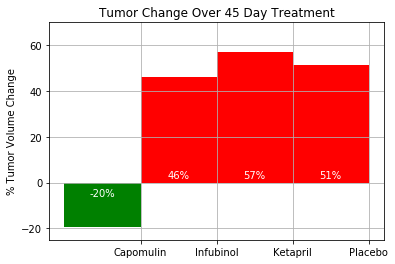

In [276]:
# Store all Relevant Percent Changes into a Tuple
#drug_changes

# Splice the data between passing and failing drugs
drug_changes["Pass/Fail"] = np.where(drug_changes['%_Change']>=0, 'r', 'g')
drug_changes["Location"] = np.where(drug_changes['%_Change']>=0, 2, -6)

y_locations = drug_changes["Location"].tolist()

# Orient widths. Add labels, tick marks, etc. 
plt.bar(drug_changes["Drug"], drug_changes["%_Change"], color = drug_changes["Pass/Fail"], align= "edge",
        width = -1)
plt.xticks((np.arange(0,4,1)))
plt.yticks((np.arange(-20,70,20)))
plt.ylim(-25,70)
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Day Treatment")
plt.grid()


for x in range(len(drug_changes)):
    plt.text(x-.5, y_locations[x], ("%.0f%%" % (round(percent_change[x],1))), horizontalalignment ='center',
             color = 'white')


# Save the Figure
plt.savefig("Tumor Change Over 45 Day Treatment")

# Show the Figure
plt.show()

## Findings

There were a few noticeable observations in this data after analyzing it - below I will go through some of them.

First, the impact the drugs have on the tumors can be broken down into two groups easily.  The results for two of the drugs had a very similar end result (~35 to 36 mm3) and then the other eight drugs (including the placebo) all having a similar end result of a tumor volume all greater than 64 mm3.  This is interesting because there wasn't much of a middle ground here, either the drugs were successful in roughly the same way, or they were unsuccessful in roughly the same way.

Along these same lines the placebo in this study had about the same results as the unsuccessful drugs, in some ways better and in other ways worse.  Perhaps with people instead of mice, this would have a larger impact, as I don't know if mice taking a placebo alters their thinking or feeling on the situation, but nevertheless, the placebo tells us just how ineffective most of the drugs were.

A third observation is how the metastatic spread continues to increase over time for each drug, but the tumor volume does not increase in all cases (Capomulin, for instance).  It's clear the that survival rate is closely realted to the tumor volume, a much closer indicator on if the mouse will survive than if you were to only look at metstatic spread.

